In [4]:
%cd ~/cdv
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '2'
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import rho_plus as rp

is_dark = False
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

/home/nmiklaucic/cdv


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
from pathlib import Path
from facet.data.databatch import CrystalGraphs
from facet.layers import Context
import pyrallis
from facet.config import MainConfig
import orbax.checkpoint as ocp

from facet.training_state import TrainingRun
from facet.checkpointing import best_ckpt


conf_file = 'configs/sevennet.toml'

with open(conf_file) as f:
    config = pyrallis.cfgparsing.load(MainConfig, f)

from facet.data.dataset import load_file

config.data.dataset_name = 'mptrj'
cgs = []
for i in range(1):
    cgs.append(load_file(config, group_num=0, file_num=i))

cg: CrystalGraphs = sum(cgs[1:], start=cgs[0])

model = config.build_regressor()

params = model.init(jax.random.key(29205), cg=cg, ctx=Context(training=True))

param_size = sum(x.size for x in jax.tree.leaves(params))
param_size

842748

In [6]:
from facet.utils import load_pytree, debug_structure

ckpt = load_pytree('precomputed/sevennet.ckpt')
print(sum(x.size for x in jax.tree.leaves(ckpt)))
debug_structure(ckpt);

842748


arg0 >>> params
├── edge_embedding >>> basis >>> freq
│   └── f32[8]
├── head
│   ├── Dense_0 >>> kernel
│   │   └── f32[128, 64]
│   └── Dense_1 >>> kernel
│       └── f32[64, 1]
├── mace
│   ├── layer_0 >>> interaction
│   │   ├── SimpleInteraction_0
│   │   │   ├── SevenNetConv_0 >>> LazyInMLP_0
│   │   │   │   ├── Dense_0
│   │   │   │   │   └── {...}
│   │   │   │   ├── Dense_1
│   │   │   │   │   └── {...}
│   │   │   │   └── Dense_2
│   │   │   │       └── {...}
│   │   │   ├── linear_intro >>> w[0,0] 128x0e,128x0e
│   │   │   │   └── f32[128, 128]
│   │   │   └── linear_outro
│   │   │       ├── w[0,0] 128x0e,224x0e
│   │   │       │   └── f32[128, 224]
│   │   │       ├── w[1,1] 128x1e,64x1e
│   │   │       │   └── f32[128, 64]
│   │   │       └── w[2,2] 128x2e,32x2e
│   │   │           └── f32[128, 32]
│   │   └── resid_adapter >>> w[0,0] 128x0e,224x0e
│   │       └── f32[128, 224]
│   ├── layer_1 >>> interaction
│   │   ├── SimpleInteraction_0
│   │   │   ├── SevenNetConv_0 >>> LazyInMLP_0
│   │   │   │   ├── Dense_0
│   │   │   │   │   └── {...}
│   │   │   │   ├── Dense_1
│   │   │   │   │   └── {...}
│   │   │   │   └── Dense_2
│   │   │   │       └── {...}
│   │   │   ├── linear_intro
│   │   │   │   ├── w[0,0] 128x0e,128x0e
│   │   │   │   │   └── f32[128, 128]
│   │   │   │   ├── w[1,1] 64x1e,64x1e
│   │   │   │   │   └── f32[64, 64]
│   │   │   │   └── w[2,2] 32x2e,32x2e
│   │   │   │       └── f32[32, 32]
│   │   │   └── linear_outro
│   │   │       ├── w[0,0] 224x0e,224x0e
│   │   │       │   └── f32[224, 224]
│   │   │       ├── w[1,1] 384x1e,64x1e
│   │   │       │   └── f32[384, 64]
│   │   │       └── w[2,2] 352x2e,32x2e
│   │   │           └── f32[352, 32]
│   │   └── resid_adapter
│   │       ├── w[0,0] 128x0e,224x0e
│   │       │   └── f32[128, 224]
│   │       ├── w[1,1] 64x1e,64x1e
│   │       │   └── f32[64, 64]
│   │       └── w[2,2] 32x2e,32x2e
│   │           └── f32[32, 32]
│   ├── layer_2 >>> interaction
│   │   ├── SimpleInteraction_0
│   │   │   ├── SevenNetConv_0 >>> LazyInMLP_0
│   │   │   │   ├── Dense_0
│   │   │   │   │   └── {...}
│   │   │   │   ├── Dense_1
│   │   │   │   │   └── {...}
│   │   │   │   └── Dense_2
│   │   │   │       └── {...}
│   │   │   ├── linear_intro
│   │   │   │   ├── w[0,0] 128x0e,128x0e
│   │   │   │   │   └── f32[128, 128]
│   │   │   │   ├── w[1,1] 64x1e,64x1e
│   │   │   │   │   └── f32[64, 64]
│   │   │   │   └── w[2,2] 32x2e,32x2e
│   │   │   │       └── f32[32, 32]
│   │   │   └── linear_outro
│   │   │       ├── w[0,0] 224x0e,224x0e
│   │   │       │   └── f32[224, 224]
│   │   │       ├── w[1,1] 384x1e,64x1e
│   │   │       │   └── f32[384, 64]
│   │   │       └── w[2,2] 352x2e,32x2e
│   │   │           └── f32[352, 32]
│   │   └── resid_adapter
│   │       ├── w[0,0] 128x0e,224x0e
│   │       │   └── f32[128, 224]
│   │       ├── w[1,1] 64x1e,64x1e
│   │       │   └── f32[64, 64]
│   │       └── w[2,2] 32x2e,32x2e
│   │           └── f32[32, 32]
│   ├── layer_3 >>> interaction
│   │   ├── SimpleInteraction_0
│   │   │   ├── SevenNetConv_0 >>> LazyInMLP_0
│   │   │   │   ├── Dense_0
│   │   │   │   │   └── {...}
│   │   │   │   ├── Dense_1
│   │   │   │   │   └── {...}
│   │   │   │   └── Dense_2
│   │   │   │       └── {...}
│   │   │   ├── linear_intro
│   │   │   │   ├── w[0,0] 128x0e,128x0e
│   │   │   │   │   └── f32[128, 128]
│   │   │   │   ├── w[1,1] 64x1e,64x1e
│   │   │   │   │   └── f32[64, 64]
│   │   │   │   └── w[2,2] 32x2e,32x2e
│   │   │   │       └── f32[32, 32]
│   │   │   └── linear_outro
│   │   │       ├── w[0,0] 224x0e,224x0e
│   │   │       │   └── f32[224, 224]
│   │   │       ├── w[1,1] 384x1e,64x1e
│   │   │       │   └── f32[384, 64]
│   │   │       └── w[2,2] 352x2e,32x2e
│   │   │           └── f32[352, 32]
│   │   └── resid_adapter
│   │       ├── w[0,0] 128x0e,224x0e
│   │       │   └── f32[128, 224]
│   │       ├── w[1,1] 64x1e,64x1e
│   │       │   └── f32[64, 64]
│   │       └── w[2,2] 32x2e,32x2e
│   │           └──

In [7]:
ctx = Context(training=False)
rng = jax.random.key(29205)
mod_ckpt = model.bind(ckpt)
out = mod_ckpt(cg=cg, ctx=ctx)
out.reshape(-1)


Array([ -7.899511 ,  -6.8716264,  -5.961386 ,  -4.2840266,  -5.1841426,
        -8.967239 ,  -5.3150234,  -7.450641 ,  -5.537923 ,  -5.68752  ,
        -4.1989927,  -7.7113433,  -6.5473313,  -6.726331 ,  -5.0812426,
        -7.1654935,  -5.8646903,  -6.5490804,  -6.180862 ,  -5.277898 ,
       -10.373719 ,  -4.053967 ,  -8.353222 ,  -5.240018 ,  -6.47511  ,
        -3.681697 ,  -7.0736284,  -7.2884817,  -9.826207 ,  -5.912565 ,
        -7.04452  ,   0.       ], dtype=float32)

In [8]:
jnp.diff(mod_ckpt.edge_embedding.basis.freq)


Array([0.6020485 , 0.6165761 , 0.6501528 , 0.66251516, 0.6809077 ,
       0.694077  , 0.7044778 ], dtype=float32)

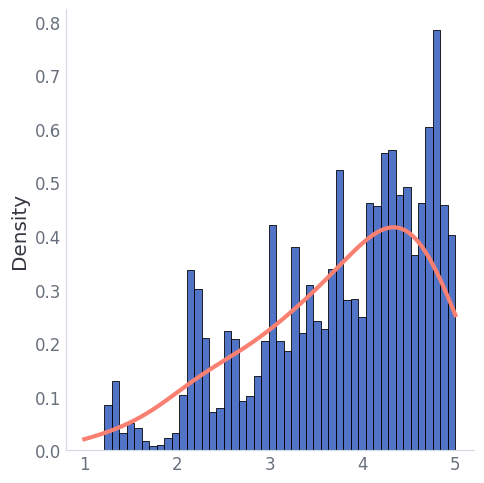

In [119]:
from facet.layers import dists

rmax = config.model.edge_embed.r_max

cg_dists = dists(cg)[cg.padding_mask[cg.nodes.graph_i]]
cg_dists = cg_dists.reshape(-1)
cg_dists = cg_dists[cg_dists < rmax]

sns.displot(cg_dists, stat='density')

num_samples = 1024

# rr = jnp.quantile(cg_dists, jnp.linspace(0, 1, num_samples))
# exact quantiles assumes this is perfectly predictive: instead, fuzz it a bit with a KDE

kde = jax.scipy.stats.gaussian_kde(cg_dists, 0.5)
dist_xx = jnp.linspace(1, 5, 1000)
dist_pdf = kde.evaluate(dist_xx)
plt.plot(dist_xx, dist_pdf, c='salmon', alpha=1, lw=3)

dist_cdf = jnp.cumsum(dist_pdf) / jnp.sum(dist_pdf)
rr = jnp.interp(jnp.linspace(0, 1, num_samples+2)[1:-1], dist_cdf, dist_xx)

In [159]:
from facet.mace.edge_embedding import BesselBasis, SincBasis

trim_params = jax.tree.map(lambda x: x, ckpt)

ckpt_basis = mod_ckpt.edge_embedding.basis
ckpt_bb = ckpt_basis(rr, rmax, ctx)
cutoff = mod_ckpt.edge_embedding.envelope(rr, rmax, ctx)[..., None]

num_basis = 8

num_new_freqs = num_basis - ckpt_basis.num_basis
# one approach: evenly distribute
# this may have overlap
new_freqs = jnp.quantile(ckpt_basis.freq, jnp.linspace(0, 1, num_new_freqs + 2)[1:-1])

# alternate approach: put frequencies between existing ones
# original frequencies are roughly equispaced
new_freqs = jnp.hstack([jnp.array([0]), ckpt_basis.freq])[:-1] + jnp.diff(ckpt_basis.freq, prepend=0) / 2
new_freqs = new_freqs[::-1][:num_new_freqs]

basis = BesselBasis(num_basis, True).bind({'params': {'freq': jnp.hstack((ckpt_basis.freq, new_freqs))}})
bb = basis(rr, rmax, ctx) * cutoff

trim_params['params']['edge_embedding']['basis']['freq'] = basis.freq

data = []

new_weights = []

r2s = []

for layer_i in range(5):
    w_mlp_params = ckpt['params']['mace'][f'layer_{layer_i}']['interaction']['SimpleInteraction_0']['SevenNetConv_0']['LazyInMLP_0']    
    w_mlp = mod_ckpt.mace.layers[layer_i].interaction.interaction.conv.radial_weight.copy(out_dim=w_mlp_params['Dense_2']['kernel'].shape[-1])

    ww = w_mlp.apply({'params': w_mlp_params}, rngs=rng, x=ckpt_bb, ctx=ctx) * cutoff
    # plt.plot(rr, ww, lw=0.3, alpha=0.2, c='grey')

    x, resid, rank, s = jnp.linalg.lstsq(bb, ww)
    ww_hat = bb @ x
    ww_err = (ww - ww_hat)
    r2 = 1 - (jnp.mean(jnp.square(ww_err)) / jnp.var(ww.reshape(-1))).item()
    r2s.append(r2)
    print(f'{r2:.2%}')
    mlp_trim = trim_params['params']['mace'][f'layer_{layer_i}']['interaction']['SimpleInteraction_0']['SevenNetConv_0']['LazyInMLP_0']
    for dense in list(mlp_trim.keys()):
        if dense.startswith('Dense_'):
            if dense == 'Dense_0':
                mlp_trim[dense]['kernel'] = x    
            else:
                del mlp_trim[dense]

    data.append({'mlp': ww, 'spline': ww_hat})

print('---------')
print(f'{np.mean(r2s):.2%}')

99.14%
99.68%
99.36%
99.33%
99.89%
---------
99.48%



[
    ... +2
]

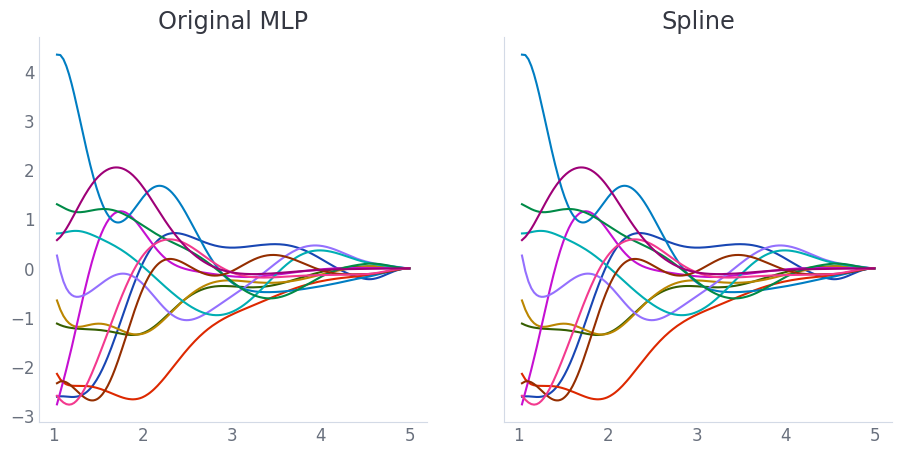

In [160]:
examples = np.random.default_rng(123).integers(0, ww.shape[1], size=12)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5), sharex=True, sharey=True)
ax1.set_title('Original MLP')
ax1.plot(rr, ww[:, examples])

ax2.set_title('Spline')
ax2.plot(rr, ww[:, examples])

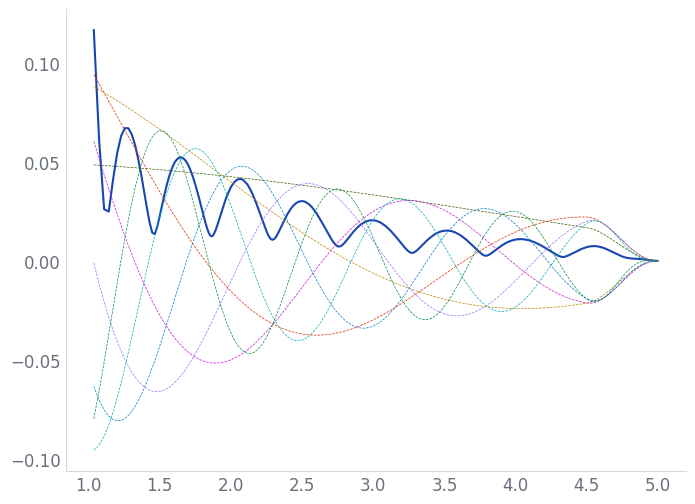

In [162]:
plt.plot(rr, jnp.sqrt(jnp.mean(jnp.square(ww_err), axis=1)))
plt.plot(rr, bb / 4, lw=0.5, ls='--');

In [163]:
np.save(f'data/sevennet_basis_{num_basis}.npy', {
    'cutoff': cutoff,
    'basis': ckpt_bb,
    'data': data,
    'rr': rr,
})

In [164]:
from operator import add
print(jax.tree.reduce(add, jax.tree.map(lambda x: x.size, trim_params)))
print(jax.tree.reduce(add, jax.tree.map(lambda x: x.size, ckpt)))

624380
842748


In [165]:
from facet.utils import save_pytree


save_pytree(trim_params, f'precomputed/sevennet-trimmed-emb{num_basis}.ckpt')

In [166]:
trim2_params = jax.tree.map(lambda x: x, trim_params)

w1 = trim2_params['params']['head']['Dense_0']['kernel']
w2 = trim2_params['params']['head']['Dense_1']['kernel']

w12 = w1 @ w2

del trim2_params['params']['head']['Dense_1']

trim2_params['params']['head']['Dense_0']['kernel'] = w12

save_pytree(trim2_params, f'precomputed/sevennet-trimmed-emb{num_basis}-linhead.ckpt')